In [ ]:
# Copy of maxime notebook

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal
from scipy import stats
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math
from sklearn import metrics

#New DataFrame
from pathlib import Path
import pickle
data_folder = Path('../claustrum-data')


In [4]:
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1a.pkl"
with open(file_to_open, 'rb') as f:
   master1a = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1b.pkl"
with open(file_to_open, 'rb') as f:
   master1b = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1c.pkl"
with open(file_to_open, 'rb') as f:
   master1c = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart1d.pkl"
with open(file_to_open, 'rb') as f:
   master1d = pickle.load(f, encoding='latin1')

In [5]:
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart2a.pkl"
with open(file_to_open, 'rb') as f:
   master2a = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart2b.pkl"
with open(file_to_open, 'rb') as f:
   master2b = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart2c.pkl"
with open(file_to_open, 'rb') as f:
   master2c = pickle.load(f, encoding='latin1')

In [6]:
file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3a.pkl"
with open(file_to_open, 'rb') as f:
   master3a = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3b.pkl"
with open(file_to_open, 'rb') as f:
   master3b = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3c.pkl"
with open(file_to_open, 'rb') as f:
   master3c = pickle.load(f, encoding='latin1')

file_to_open = data_folder / "Master_log_OptoSameTT_LITEpart3d.pkl"
with open(file_to_open, 'rb') as f:
   master3d = pickle.load(f, encoding='latin1')

In [7]:
master_log=pd.concat([master1a,master1b,master1c,master1d,master2a,master2b,master2c, master3a,master3b,master3c,master3d], axis=0)
del master1a,master1b,master1c,master1d,master2a,master2b,master2c, master3a,master3b,master3c,master3d

In [8]:
cd C:\Users\Brown Lab\Desktop\Analysis working folder\Claustrum explore

[WinError 3] The system cannot find the path specified: 'C:\\Users\\Brown Lab\\Desktop\\Analysis working folder\\Claustrum explore'
D:\Documents\python\research-files\scripts


In [84]:
def fixed_aspect_ratio(ratio):
    from matplotlib.pyplot import gca
    '''
    Set a fixed aspect ratio on matplotlib plots 
    regardless of axis units
    '''
    xvals,yvals = gca().axes.get_xlim(),gca().axes.get_ylim()

    xrange = xvals[1]-xvals[0]
    yrange = yvals[1]-yvals[0]
    gca().set_aspect(ratio*(xrange/yrange), adjustable='box')

In [ ]:
##########################################################################################################
## Repeat the non_rewarded lick analysis but only count the licks that are not in the middle of bouts. So only isolated licks or first lick of a bout
##########################################################################################################

Name_df=['non_rewarded_Right_licksNonBouts', 'non_rewarded_Left_licksNonBouts'    ]
for i,name in enumerate(Name_df):   
    master_log[Name_df[i]]=np.zeros(len(master_log))
    master_log[Name_df[i]]=master_log[Name_df[i]].astype(object)
    
mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25', 'Cl4','Cl5', 'Cl6'])
for mouse in mice:
    for i in master_log[master_log['mouse_name']==mouse].index:
        temp_right=[]
        temp_left=[]
        trial_log=master_log.loc[i,:]
        for ind in range(0, len(trial_log.non_rewarded_licks)):
            if ind==0: #if first lick analyzed no need to check before
                if trial_log['non_rewarded_licks'][ind] in  trial_log['licks_right'][0][0]:
                    temp_right.append(trial_log['non_rewarded_licks'][ind])
               
                if trial_log['non_rewarded_licks'][ind] in  trial_log['licks_left'][0][0]:
                    temp_left.append(trial_log['non_rewarded_licks'][ind])
            elif trial_log['non_rewarded_licks'][ind] - trial_log['non_rewarded_licks'][ind-1]>0.5: # so only if the lick is not preceded by a lick within 500msec
                if trial_log['non_rewarded_licks'][ind] in  trial_log['licks_right'][0][0]:
                    temp_right.append(trial_log['non_rewarded_licks'][ind])
               
                if trial_log['non_rewarded_licks'][ind] in  trial_log['licks_left'][0][0]:
                    temp_left.append(trial_log['non_rewarded_licks'][ind])
        master_log.at[i,'non_rewarded_Right_licksNonBouts']=temp_right
        master_log.at[i,'non_rewarded_Left_licksNonBouts']=temp_left
        test=master_log['non_rewarded_Left_licksNonBouts']
# 'NR_Right_licks_aligned_spikes', 'NR_Left_licks_aligned_spikes'

        
NR_Right_licks_aligned_spikes_NonBouts = []
NR_Left_licks_aligned_spikes_NonBouts = []

for num in master_log.non_rewarded_licks.index:
    temp_right = []
    temp_left = []
    for ind in range(0, len(master_log.non_rewarded_licks[num])):
        if master_log['non_rewarded_licks'][num][ind] in  master_log['non_rewarded_Right_licksNonBouts'][num]:
            temp_right.append(np.array([np.squeeze(master_log['spike_times'][num])-master_log['non_rewarded_licks'][num][ind]]))
        elif master_log['non_rewarded_licks'][num][ind] in  master_log['non_rewarded_Left_licksNonBouts'][num]:
            temp_left.append(np.array([np.squeeze(master_log['spike_times'][num])-master_log['non_rewarded_licks'][num][ind]]))

                
    NR_Right_licks_aligned_spikes_NonBouts.append(temp_right)
    NR_Left_licks_aligned_spikes_NonBouts.append(temp_left)
master_log['NR_Right_licks_aligned_spikes_NonBouts'] = NR_Right_licks_aligned_spikes_NonBouts
master_log['NR_Left_licks_aligned_spikes_NonBouts'] = NR_Left_licks_aligned_spikes_NonBouts

In [18]:
#First run this block from 'Notebook_heatmaps' to get the same index as sorted on SomHits
#OptoTag SomHit
temp_units1=[]
Category='OptoTag'
mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25'])
#mice=np.array([ 'Cl4','Cl5', 'Cl6'])

for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_trial=[]
            #print(unit)
            for trial in unit_log[unit_log['Stim/Block/Response']=='SomHit'].index:
                trial_log=unit_log.loc[trial,:]
                temp_trial.append(trial_log['Zscored_-1to3sec_25msecbins_StimAligned'])
            temp_units1.append(np.mean(temp_trial, axis=0))


Sum_for_index=[np.sum(i[40:80]) for i in temp_units1]
index=np.argsort(np.asarray(Sum_for_index))
sorted_temp_units1=[temp_units1[i] for i in index[::-1]]

In [118]:
#Plot responses to NR_NonBouts and generate variables for analysis/comparison
##
mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25'])
#mice=np.array([ 'Cl4','Cl5', 'Cl6'])

H=1
temp_units1=[]
temp_units1_totallicks=[]
temp_mousename1=[]
temp_KStest=[]
Category='OptoTag'
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            temp_pre=[] # to store dist pre
            temp_post=[] # to store dist post
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[] #to store spikes
                temp_intrial_licks=[] # to store licks
                for lick in trial_log['NR_Right_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                    temp_pre.append(np.sum((lick>-2) & (lick<-1)))
                    temp_post.append(np.sum((lick>-0.2) & (lick<0.8)))
                temp_intrial_licks.append(len(trial_log['non_rewarded_Right_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            K,p=stats.ks_2samp(temp_pre,temp_post)
            temp_KStest.append(p)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units1.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units1_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename1.append(mouse)
peak_Right=[]
test=[]
for each in np.arange(len(temp_units1)):
    Spikes=temp_units1[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
   # plt.figure()
   # plt.bar(np.arange(len(data)),data)
    test.append(data)
    peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    

H=1
temp_units2=[]
temp_units2_totallicks=[]
temp_mousename2=[]
temp_KStest2=[]
Category='OptoTag'
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            temp_pre=[] # to store dist pre
            temp_post=[] # to store dist post
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[] #to store spikes
                temp_intrial_licks=[] # to store licks
                for lick in trial_log['NR_Left_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                    temp_pre.append(np.sum((lick>-2) & (lick<-1)))
                    temp_post.append(np.sum((lick>-0.2) & (lick<0.8)))
                temp_intrial_licks.append(len(trial_log['non_rewarded_Left_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            K,p=stats.ks_2samp(temp_pre,temp_post)
            temp_KStest2.append(p)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units2.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units2_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename2.append(mouse)
peak_Left=[]
test=[]
for each in np.arange(len(temp_units2)):
    Spikes=temp_units2[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units2_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
   # plt.figure()
   # plt.bar(np.arange(len(data)),data)
    test.append(data)
    peak_Left.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    
    
#for Opto: 1 neuron not responsive to either side, all 50 others are responsive to both sides



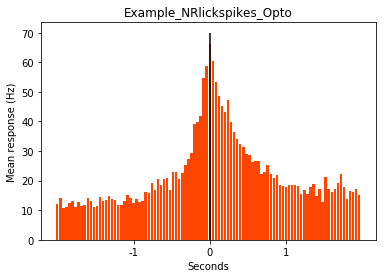

In [68]:
#Plot example: responsive
peak_Right=[]
test=[]
each=1
Spikes=temp_units1[each]
Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
Spikes_superflat=np.hstack(Spikes_flat)
NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
data=data/NumLicks #Normalize
plt.figure()
plt.bar(np.arange(len(data)),data*25, color='orangered')
test.append(data)
peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges

plt.xticks([25,50,75], ['-1', '0', '1'])
plt.vlines(50, 0,70)
plt.title('Example_NRlickspikes_Opto')
plt.xlabel('Seconds')
plt.ylabel('Mean response (Hz)')
plt.savefig('Example_NRlickspikes_Opto (responsive).pdf')

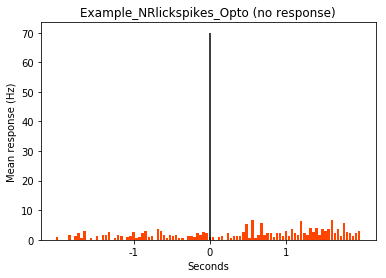

In [73]:
# Plot example non-responsive
peak_Right=[]
test=[]
each=9
Spikes=temp_units1[each]
Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
Spikes_superflat=np.hstack(Spikes_flat)
NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
data=data/NumLicks #Normalize
plt.figure()
plt.bar(np.arange(len(data)),data*25, color='orangered')
test.append(data)
peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges

plt.xticks([25,50,75], ['-1', '0', '1'])
plt.vlines(50, 0,70)
plt.title('Example_NRlickspikes_Opto (no response)')
plt.xlabel('Seconds')
plt.ylabel('Mean response (Hz)')
plt.savefig('Example_NRlickspikes_Opto (NONresponsive).pdf')

In [35]:
# Calculate ratio of responive neurons
x=[c for c in temp_KStest if c>0.05]
print(len(x))
print(len(temp_KStest))

2
51


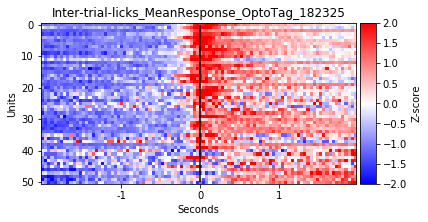

In [39]:
# Summary heatmap

Zscore_test=[sp.stats.zscore(i)for i in test]
#Sum_for_index=[np.sum(i[40:80]) for i in Zscore_test]
#index=np.argsort(np.asarray(Sum_for_index))
sorted_Zscore_test=[Zscore_test[i] for i in index[::-1]]
NR=plt.imshow(sorted_Zscore_test, vmin=-2, vmax=2, cmap='bwr')
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.xticks([25,50,75], ['-1', '0', '1'])
plt.vlines(50, 0,50)
plt.title('Inter-trial-licks_MeanResponse_OptoTag_182325')
plt.xlabel('Seconds')
plt.ylabel('Units')

ax = plt.gca()
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(NR, cax=cax)
cbar.set_label('Z-score')
plt.savefig('Inter-trial-licks_MeanResponse_OptoTag_182325.pdf')


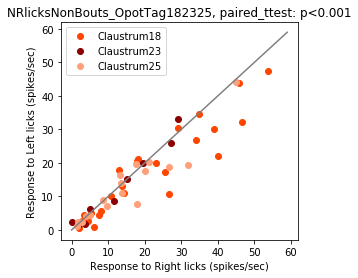

In [101]:
# Scatter plot to compare Lright s LLeft
import scipy.stats as sp
df = pd.DataFrame(
    {'mousename': temp_mousename1,
     'peak_Right': peak_Right,
     'peak_Left': peak_Left
    })
groups = df.groupby('mousename')
fig, ax = plt.subplots()
ax.set_prop_cycle(color=['orangered','darkred','lightsalmon'])
#ax.set_prop_cycle(color=['darkred','orangered','lightsalmon'])
#ax.set_prop_cycle(color=['midnightblue','cornflowerblue','lightsteelblue'])

for name, group in groups:
    ax.plot(group.peak_Right, group.peak_Left, marker='o', linestyle='', ms=6, label=name)
ax.legend()
fixed_aspect_ratio(0.8)
#plt.scatter(peak_Right, peak_Left, c='cornflowerblue')#, c=mpi, cmap='seismic')
#plt.colorbar()
ax.plot(np.arange(0,60),np.arange(0,60), color='grey')
ax.set_xlabel('Response to Right licks (spikes/sec)')
ax.set_ylabel('Response to Left licks (spikes/sec)')
s,p=sp.ttest_rel(peak_Right, peak_Left)
plt.title('NRlicksNonBouts_OpotTag182325, paired_ttest: p<'+str(p)[:5])
plt.savefig('NRlicksNonBouts_RightvsLeft_OpotTag182325.pdf')

In [117]:
#correlation between NRlick spikes ad Hit spikes 
mice=np.array(['Claustrum18', 'Claustrum23', 'Claustrum25'])
#mice=np.array(['Cl4', 'Cl5', 'Cl6'])

temp_units1=[]
FRs0=[]
Category='OptoTag'
H=1
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            TrialType1='VisHit'
            TrialType2='SomHit'
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            Type_log=unit_log[(unit_log['Stim/Block/Response']==TrialType1) | (unit_log['Stim/Block/Response']==TrialType2)]
            temp_units1.append(Type_log.loc[Type_log.index[0],'Modality Preference Index'])
            FRs0.append(np.mean(np.mean(Type_log['Zscored_-1to3sec_25msecbins_StimAligned'])[40:120]))




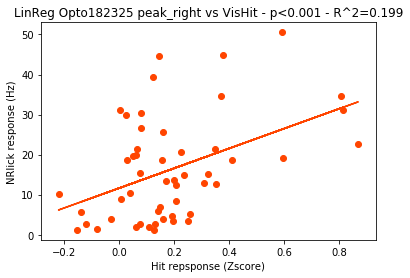

In [124]:
#Be careful when plotting: everything flips depending on mice (not just the commented stuff), also these should be split for CL456
# based on time (0-.7, 1-2)
Y=np.mean(np.asarray([peak_Right,peak_Left]), axis=0)
plt.scatter(FRs0,Y, c='orangered')

from scipy.stats import linregress
f=linregress(FRs0,Y)
plt.plot(FRs0,[i*f.slope+f.intercept for i in FRs0], color='orangered')
plt.title('LinReg Opto182325 peak_right vs VisHit - p<'+str(f.pvalue)[0:5]+' - R^2='+str(np.round(f.rvalue**2, 3)))
plt.xlabel('Hit repsponse (Zscore)')
plt.ylabel('NRlick response (Hz)')
plt.savefig('LinReg Optotag182325 peak_NRlicks vs Hit.pdf')


In [40]:
#First run this block from 'Notebook_heatmaps' to get the same index as sorted on SomHits
#OptoTag SomHit
temp_units1=[]
Category='SameTT'
mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25'])
#mice=np.array([ 'Cl4','Cl5', 'Cl6'])

for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_trial=[]
            #print(unit)
            for trial in unit_log[unit_log['Stim/Block/Response']=='SomHit'].index:
                trial_log=unit_log.loc[trial,:]
                temp_trial.append(trial_log['Zscored_-1to3sec_25msecbins_StimAligned'])
            temp_units1.append(np.mean(temp_trial, axis=0))


Sum_for_index=[np.sum(i[40:80]) for i in temp_units1]
index=np.argsort(np.asarray(Sum_for_index))
sorted_temp_units1=[temp_units1[i] for i in index[::-1]]

In [125]:
#Plot responses to NR_NonBouts and generate variables for analysis/comparison
##
mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25'])
#mice=np.array([ 'Cl4','Cl5', 'Cl6'])

H=1
temp_units1=[]
temp_units1_totallicks=[]
temp_mousename1=[]
temp_KStest=[]
Category='SameTT'
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            temp_pre=[] # to store dist pre
            temp_post=[] # to store dist post
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[] #to store spikes
                temp_intrial_licks=[] # to store licks
                for lick in trial_log['NR_Right_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                    temp_pre.append(np.sum((lick>-2) & (lick<-1)))
                    temp_post.append(np.sum((lick>-0.2) & (lick<0.8)))
                temp_intrial_licks.append(len(trial_log['non_rewarded_Right_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            K,p=stats.ks_2samp(temp_pre,temp_post)
            temp_KStest.append(p)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units1.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units1_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename1.append(mouse)
peak_Right=[]
test=[]
for each in np.arange(len(temp_units1)):
    Spikes=temp_units1[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
   # plt.figure()
   # plt.bar(np.arange(len(data)),data)
    test.append(data)
    peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    

H=1
temp_units2=[]
temp_units2_totallicks=[]
temp_mousename2=[]
temp_KStest2=[]
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            temp_pre=[] # to store dist pre
            temp_post=[] # to store dist post
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[] #to store spikes
                temp_intrial_licks=[] # to store licks
                for lick in trial_log['NR_Left_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                    temp_pre.append(np.sum((lick>-2) & (lick<-1)))
                    temp_post.append(np.sum((lick>-0.2) & (lick<0.8)))
                temp_intrial_licks.append(len(trial_log['non_rewarded_Left_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            K,p=stats.ks_2samp(temp_pre,temp_post)
            temp_KStest2.append(p)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units2.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units2_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename2.append(mouse)
peak_Left=[]
test=[]
for each in np.arange(len(temp_units2)):
    Spikes=temp_units2[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units2_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
   # plt.figure()
   # plt.bar(np.arange(len(data)),data)
    test.append(data)
    peak_Left.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    
    
#for Opto: 1 neuron not responsive to either side, all 50 others are responsive to both sides



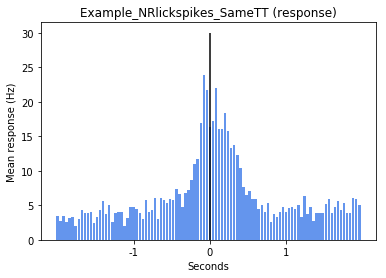

In [79]:
# Plot example responsive SameTT
peak_Right=[]
test=[]
each=44
Spikes=temp_units1[each]
Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
Spikes_superflat=np.hstack(Spikes_flat)
NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
data=data/NumLicks #Normalize
plt.figure()
plt.bar(np.arange(len(data)),data*25, color='cornflowerblue')
test.append(data)
peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges

plt.xticks([25,50,75], ['-1', '0', '1'])
plt.vlines(50, 0,30)
plt.title('Example_NRlickspikes_SameTT (response)')
plt.xlabel('Seconds')
plt.ylabel('Mean response (Hz)')
plt.savefig('Example_NRlickspikes_SameTT (responsive).pdf')

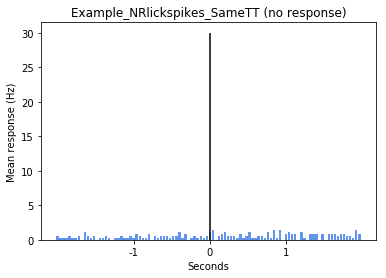

In [78]:
# Plot example non-responsive SameTT
peak_Right=[]
test=[]
each=22
Spikes=temp_units1[each]
Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
Spikes_superflat=np.hstack(Spikes_flat)
NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
data=data/NumLicks #Normalize
plt.figure()
plt.bar(np.arange(len(data)),data*25, color='cornflowerblue')
test.append(data)
peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges

plt.xticks([25,50,75], ['-1', '0', '1'])
plt.vlines(50, 0,30)
plt.title('Example_NRlickspikes_SameTT (no response)')
plt.xlabel('Seconds')
plt.ylabel('Mean response (Hz)')
plt.savefig('Example_NRlickspikes_SameTT (NONresponsive).pdf')

In [42]:
x=[c for c in temp_KStest if c>0.05]
print(len(x))
print(len(temp_KStest))

22
89


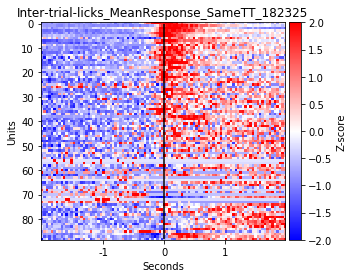

In [45]:


Zscore_test=[sp.stats.zscore(i)for i in test]
#Sum_for_index=[np.sum(i[40:80]) for i in Zscore_test]
#index=np.argsort(np.asarray(Sum_for_index))
sorted_Zscore_test=[Zscore_test[i] for i in index[::-1]]
NR=plt.imshow(sorted_Zscore_test, vmin=-2, vmax=2, cmap='bwr')
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.xticks([25,50,75], ['-1', '0', '1'])
plt.vlines(50, 0,88)
plt.title('Inter-trial-licks_MeanResponse_SameTT_182325')
plt.xlabel('Seconds')
plt.ylabel('Units')

ax = plt.gca()
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(NR, cax=cax)
cbar.set_label('Z-score')
plt.savefig('Inter-trial-licks_MeanResponse_SameTT_182325.pdf')


In [27]:
sp.stats.ttest_rel(peak_Right, peak_Left)

Ttest_relResult(statistic=0.9197333970873288, pvalue=0.36725821070729525)

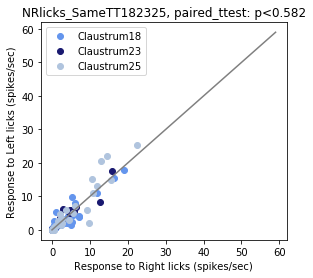

In [105]:
import scipy.stats as sp
df = pd.DataFrame(
    {'mousename': temp_mousename1,
     'peak_Right': peak_Right,
     'peak_Left': peak_Left
    })
groups = df.groupby('mousename')
fig, ax = plt.subplots()
#ax.set_prop_cycle(color=['darkred','orangered','lightsalmon'])
ax.set_prop_cycle(color=['cornflowerblue','midnightblue','lightsteelblue'])

for name, group in groups:
    ax.plot(group.peak_Right, group.peak_Left, marker='o', linestyle='', ms=6, label=name)
ax.legend()
fixed_aspect_ratio(1)
#plt.scatter(peak_Right, peak_Left, c='cornflowerblue')#, c=mpi, cmap='seismic')
#plt.colorbar()
ax.plot(np.arange(0,60),np.arange(0,60), color='grey')
ax.set_xlabel('Response to Right licks (spikes/sec)')
ax.set_ylabel('Response to Left licks (spikes/sec)')
s,p=sp.ttest_rel(peak_Right, peak_Left)
plt.title('NRlicks_SameTT182325, paired_ttest: p<'+str(p)[:5])
plt.savefig('NRlicksNonBouts_RightvsLeft_SameTT182325.pdf')

In [126]:
#correlation between NRlick spikes ad Hit spikes 
mice=np.array(['Claustrum18', 'Claustrum23', 'Claustrum25'])
#mice=np.array(['Cl4', 'Cl5', 'Cl6'])

temp_units1=[]
FRs0=[]
Category='SameTT'
H=1
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            TrialType1='VisHit'
            TrialType2='SomHit'
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            Type_log=unit_log[(unit_log['Stim/Block/Response']==TrialType1) | (unit_log['Stim/Block/Response']==TrialType2)]
            temp_units1.append(Type_log.loc[Type_log.index[0],'Modality Preference Index'])
            FRs0.append(np.mean(np.mean(Type_log['Zscored_-1to3sec_25msecbins_StimAligned'])[40:120]))




2.435601296049076e-08


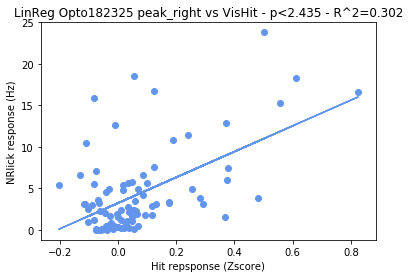

In [129]:
#Be careful when plotting: everything flips depending on mice (not just the commented stuff), also these should be split for CL456
# based on time (0-.7, 1-2)
Y=np.mean(np.asarray([peak_Right,peak_Left]), axis=0)
plt.scatter(FRs0,Y, c='cornflowerblue')

from scipy.stats import linregress
f=linregress(FRs0,Y)
plt.plot(FRs0,[i*f.slope+f.intercept for i in FRs0], color='cornflowerblue')
plt.title('LinReg Opto182325 peak_right vs VisHit - p<'+str(f.pvalue)[0:5]+' - R^2='+str(np.round(f.rvalue**2, 3)))
plt.xlabel('Hit repsponse (Zscore)')
plt.ylabel('NRlick response (Hz)')
plt.savefig('LinReg SameTT182325 peak_NRlicks vs Hit.pdf')
print(f.pvalue)

In [139]:
#Plot responses to NR_NonBouts and generate variables for analysis/comparison
##
#mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25'])
mice=np.array([ 'Cl4','Cl5', 'Cl6'])

H=1
temp_units1=[]
temp_units1_totallicks=[]
temp_mousename1=[]
Category='OptoTag'
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[]
                temp_intrial_licks=[]
                for lick in trial_log['NR_Right_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                temp_intrial_licks.append(len(trial_log['non_rewarded_Right_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units1.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units1_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename1.append(mouse)
peak_Right=[]
test=[]
for each in np.arange(len(temp_units1)):
    Spikes=temp_units1[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
    #plt.figure()
    #plt.bar(np.arange(len(data)),data)
    test.append(data)
    peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    

temp_units2=[]
temp_units2_totallicks=[]
temp_mousename2=[]
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[]
                temp_intrial_licks=[]
                for lick in trial_log['NR_Left_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                temp_intrial_licks.append(len(trial_log['non_rewarded_Left_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units2.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units2_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename2.append(mouse)
peak_Left=[]
test2=[]
for each in np.arange(len(temp_units2)):
    Spikes=temp_units2[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units2_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
    peak_Left.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    test2.append(data)
    




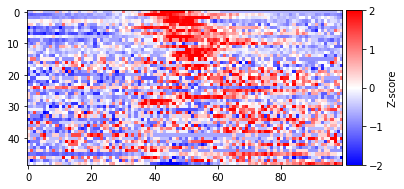

In [32]:


Zscore_test=[sp.stats.zscore(i)for i in testS]
#Sum_for_index=[np.sum(i[40:80]) for i in Zscore_test]
#index=np.argsort(np.asarray(Sum_for_index))
sorted_Zscore_test=[Zscore_test[i] for i in index[::-1]]
NR=plt.imshow(sorted_Zscore_test, vmin=-2, vmax=2, cmap='bwr')
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.gca()
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(NR, cax=cax)
cbar.set_label('Z-score')

In [33]:
sp.stats.ttest_rel(peak_RightS, peak_LeftS)

Ttest_relResult(statistic=1.5744311546697247, pvalue=0.12195671178629659)

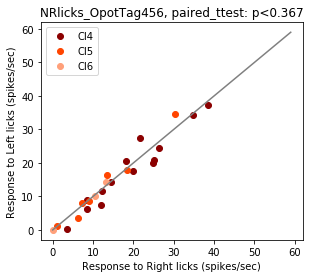

In [116]:
import scipy.stats as sp
df = pd.DataFrame(
    {'mousename': temp_mousename1,
     'peak_Right': peak_Right,
     'peak_Left': peak_Left
    })
groups = df.groupby('mousename')
fig, ax = plt.subplots()
ax.set_prop_cycle(color=['darkred','orangered','lightsalmon'])
#ax.set_prop_cycle(color=['midnightblue','cornflowerblue','lightsteelblue'])

for name, group in groups:
    ax.plot(group.peak_Right, group.peak_Left, marker='o', linestyle='', ms=6, label=name)
ax.legend()
fixed_aspect_ratio(0.8)
#plt.scatter(peak_Right, peak_Left, c='cornflowerblue')#, c=mpi, cmap='seismic')
#plt.colorbar()
ax.plot(np.arange(0,60),np.arange(0,60), color='grey')
ax.set_xlabel('Response to Right licks (spikes/sec)')
ax.set_ylabel('Response to Left licks (spikes/sec)')
s,p=sp.ttest_rel(peak_Right, peak_Left)
plt.title('NRlicks_OpotTag456, paired_ttest: p<'+str(p)[:5])
plt.savefig('NRlicksNonBouts_RightvsLeft_OptoTag456.pdf')

In [140]:
#correlation between NRlick spikes ad Hit spikes 
#mice=np.array(['Claustrum18', 'Claustrum23', 'Claustrum25'])
mice=np.array(['Cl4', 'Cl5', 'Cl6'])

temp_units1=[]
FRs0=[]
Category='OptoTag'
H=1
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            TrialType1='VisHit'
            TrialType2='SomHit'
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            Type_log=unit_log[(unit_log['Stim/Block/Response']==TrialType1) | (unit_log['Stim/Block/Response']==TrialType2)]
            temp_units1.append(Type_log.loc[Type_log.index[0],'Modality Preference Index'])
            FRs0.append(np.mean(np.mean(Type_log['Zscored_-1to3sec_25msecbins_StimAligned'])[40:120]))




0.005982100853101464


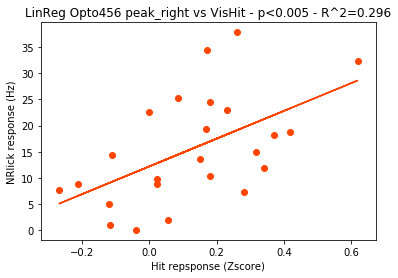

In [141]:
#Be careful when plotting: everything flips depending on mice (not just the commented stuff), also these should be split for CL456
# based on time (0-.7, 1-2)
Y=np.mean(np.asarray([peak_Right,peak_Left]), axis=0)
plt.scatter(FRs0,Y, c='orangered')

from scipy.stats import linregress
f=linregress(FRs0,Y)
plt.plot(FRs0,[i*f.slope+f.intercept for i in FRs0], color='orangered')
plt.title('LinReg Opto456 peak_right vs VisHit - p<'+str(f.pvalue)[0:5]+' - R^2='+str(np.round(f.rvalue**2, 3)))
plt.xlabel('Hit repsponse (Zscore)')
plt.ylabel('NRlick response (Hz)')
plt.savefig('LinReg OptoTag456 peak_NRlicks vs Hit.pdf')
print(f.pvalue)

In [135]:
#Plot responses to NR_NonBouts and generate variables for analysis/comparison
##
#mice=np.array([ 'Claustrum18','Claustrum23', 'Claustrum25'])
mice=np.array([ 'Cl4','Cl5', 'Cl6'])

H=1
temp_units1=[]
temp_units1_totallicks=[]
temp_mousename1=[]
Category='SameTT'
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[]
                temp_intrial_licks=[]
                for lick in trial_log['NR_Right_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                temp_intrial_licks.append(len(trial_log['non_rewarded_Right_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units1.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units1_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename1.append(mouse)
peak_Right=[]
test=[]
for each in np.arange(len(temp_units1)):
    Spikes=temp_units1[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units1_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
    #plt.figure()
    #plt.bar(np.arange(len(data)),data)
    test.append(data)
    peak_Right.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    

temp_units2=[]
temp_units2_totallicks=[]
temp_mousename2=[]
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            temp_unit=[]
            temp_unit_licks=[]
            #print(unit)
            for trial in unit_log.index:
                trial_log=unit_log.loc[trial,:]
                temp_intrial=[]
                temp_intrial_licks=[]
                for lick in trial_log['NR_Left_licks_aligned_spikes_NonBouts']:
                    temp_intrial.append(lick) 
                temp_intrial_licks.append(len(trial_log['non_rewarded_Left_licksNonBouts'])) #get the numbe of right non-rewarded licks, weill be used to normalize
                temp_unit.append(temp_intrial)
                temp_unit_licks.append(temp_intrial_licks)
            unit_spikes=[x for l in temp_unit for x in l]    #this listcpmprehension helps unpack the arrays.
            temp_units2.append(unit_spikes) #list, one entry per unit, each entry has multiple 1d arrays of spikes
            temp_units2_totallicks.append(temp_unit_licks)#list, one entry per unit, each entry has multiple scalars with number of licks in trial
            temp_mousename2.append(mouse)
peak_Left=[]
test2=[]
for each in np.arange(len(temp_units2)):
    Spikes=temp_units2[each]
    Spikes_flat=[x for l in Spikes for x in l] #all 'non_rewarded_Right_licks' for unit
    Spikes_superflat=np.hstack(Spikes_flat)
    NumLicks=sum(np.asarray(temp_units2_totallicks[each])) #total number of licks that generated the spikes
    data,x=np.histogram(Spikes_superflat,bins=100, range=(-2,2) )
    data=data/NumLicks #Normalize
    peak_Left.append(np.sum(data[np.argmax(data)-12:np.argmax(data)+13])) #This would fail if peak is close to the edges
    test2.append(data)
    




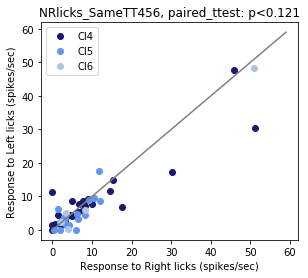

In [114]:
import scipy.stats as sp
df = pd.DataFrame(
    {'mousename': temp_mousename1,
     'peak_Right': peak_Right,
     'peak_Left': peak_Left
    })
groups = df.groupby('mousename')
fig, ax = plt.subplots()
#ax.set_prop_cycle(color=['darkred','orangered','lightsalmon'])
ax.set_prop_cycle(color=['midnightblue','cornflowerblue','lightsteelblue'])

for name, group in groups:
    ax.plot(group.peak_Right, group.peak_Left, marker='o', linestyle='', ms=6, label=name)
ax.legend()
fixed_aspect_ratio(0.8)
#plt.scatter(peak_Right, peak_Left, c='cornflowerblue')#, c=mpi, cmap='seismic')
#plt.colorbar()
ax.plot(np.arange(0,60),np.arange(0,60), color='grey')
ax.set_xlabel('Response to Right licks (spikes/sec)')
ax.set_ylabel('Response to Left licks (spikes/sec)')
s,p=sp.ttest_rel(peak_Right, peak_Left)
plt.title('NRlicks_SameTT456, paired_ttest: p<'+str(p)[:5])
plt.savefig('NRlicksNonBouts_RightvsLeft_SameTT456.pdf')

In [136]:
#correlation between NRlick spikes ad Hit spikes 
#mice=np.array(['Claustrum18', 'Claustrum23', 'Claustrum25'])
mice=np.array(['Cl4', 'Cl5', 'Cl6'])

temp_units1=[]
FRs0=[]
Category='SameTT'
H=1
for mouse in mice:
    mouse_log=master_log.loc[np.equal(master_log['mouse_name'], mouse)]
    for day in np.unique(mouse_log['date']):
        day_log=mouse_log.loc[np.equal(mouse_log['date'], day)]
        for unit in np.unique(day_log['cluster_name'][(day_log['Category']==Category)]):
            TrialType1='VisHit'
            TrialType2='SomHit'
            unit_log=day_log.loc[np.equal(day_log['cluster_name'], unit)]
            Type_log=unit_log[(unit_log['Stim/Block/Response']==TrialType1) | (unit_log['Stim/Block/Response']==TrialType2)]
            temp_units1.append(Type_log.loc[Type_log.index[0],'Modality Preference Index'])
            FRs0.append(np.mean(np.mean(Type_log['Zscored_-1to3sec_25msecbins_StimAligned'])[40:120]))




2.2652435977603272e-07


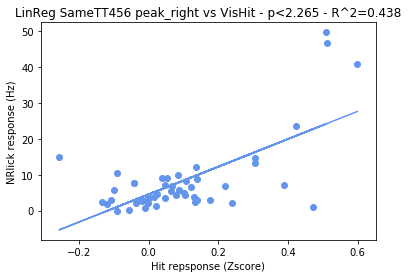

In [138]:
#Be careful when plotting: everything flips depending on mice (not just the commented stuff), also these should be split for CL456
# based on time (0-.7, 1-2)
Y=np.mean(np.asarray([peak_Right,peak_Left]), axis=0)
plt.scatter(FRs0,Y, c='cornflowerblue')

from scipy.stats import linregress
f=linregress(FRs0,Y)
plt.plot(FRs0,[i*f.slope+f.intercept for i in FRs0], color='cornflowerblue')
plt.title('LinReg SameTT456 peak_right vs VisHit - p<'+str(f.pvalue)[0:5]+' - R^2='+str(np.round(f.rvalue**2, 3)))
plt.xlabel('Hit repsponse (Zscore)')
plt.ylabel('NRlick response (Hz)')
plt.savefig('LinReg SameTT456 peak_NRlicks vs Hit.pdf')
print(f.pvalue)